## Expresión del método:
Para obtener una solución aproximada de la ecuación diferencial:
$$\frac{dx}{dt}=f(x,t),$$
utilizando el método de Euler, se implementa la siguiente fórmula de recurrencia:
$$x_{k+1}=x_k+f(x_k,t_k),$$
donde $x_k=x(t_k)$ y $t_k=h k.$
No olvide que para resolver una ecuación diferencial necesitamos la condición inicial, que para este método naturalmente se hace corresponder con $x_0$.

In [1]:
function euler(f,x0,t0,tf,h)
    x=x0
    t=t0
    list_x=[]
    list_t=[]
    push!(list_x,x)
    push!(list_t,t)
    for i in 1:(tf-t0)/h
        t=i*h
        x=x+h*f(x,t)
        push!(list_x,x)
        push!(list_t,t)
    end
    return list_x, list_t
end 
        
    

euler (generic function with 1 method)

* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.

In [2]:
list1=euler((x,t)->(-2.5)*x,1,0,8,1.0);
list1

(Any[1, -1.5, 2.25, -3.375, 5.0625, -7.59375, 11.3906, -17.0859, 25.6289], Any[0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0])

In [3]:
list8=euler((x,t)->(-2.5)*x,2,0,8,1.0);
list8

(Any[2, -3.0, 4.5, -6.75, 10.125, -15.1875, 22.7813, -34.1719, 51.2578], Any[0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0])

In [4]:
list2=euler((x,t)->(-2.5)*x,1,0,8,0.5);
list3=euler((x,t)->(-2.5)*x,1,0,8,0.2);
list4=euler((x,t)->(-2.5)*x,1,0,8,0.1);
list5=euler((x,t)->(-2.5)*x,2,0,8,0.5);
list6=euler((x,t)->(-2.5)*x,2,0,8,0.2);
list7=euler((x,t)->(-2.5)*x,2,0,8,0.1);

In [5]:
function q(x,t)
    exp.(-5t/2)
end

q (generic function with 1 method)

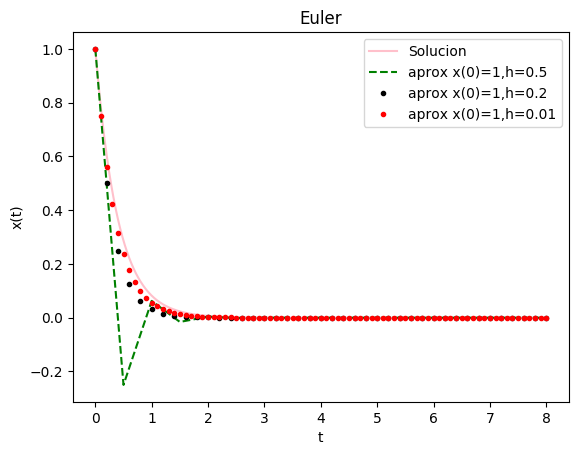

PyObject <matplotlib.legend.Legend object at 0x7f65fa5be9d0>

In [6]:
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Euler") 
t=linspace(0,8,1000)
plot(t,q(1,t),label= "Solucion", color= "pink")
legend()
plot(list2[2],list2[1],label= "aprox x(0)=1,h=0.5","--",color="green")
legend()
plot(list3[2],list3[1],label= "aprox x(0)=1,h=0.2",".",color="black")
legend()
plot(list4[2],list4[1],label= "aprox x(0)=1,h=0.01",".",color="red")
legend()

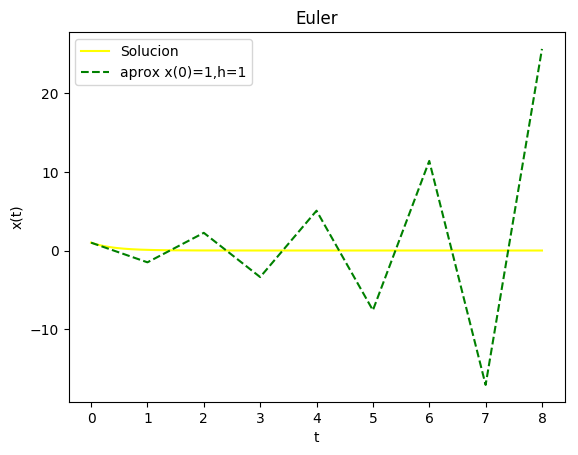

PyObject <matplotlib.legend.Legend object at 0x7f65fa2cde10>

In [7]:
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Euler") 
t=linspace(0,8,1000)
plot(t,q(1,t),label= "Solucion", color= "yellow")
legend()
plot(list1[2],list1[1],label= "aprox x(0)=1,h=1","--",color="green")
legend()

In [8]:
function Q(x,t)
    2exp.(-5t/2)
end

Q (generic function with 1 method)

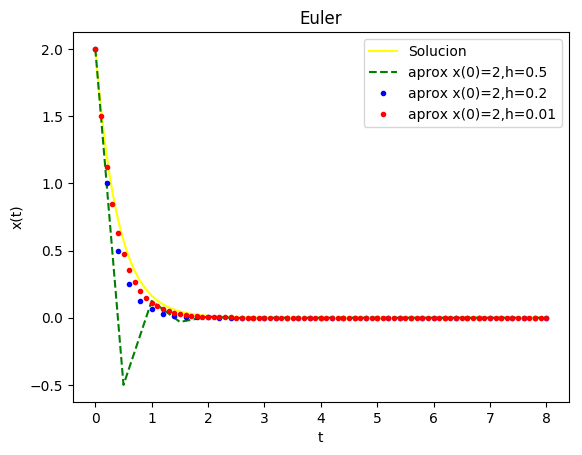

PyObject <matplotlib.legend.Legend object at 0x7f65fa1cfa10>

In [9]:
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Euler") 
t=linspace(0,8,1000)
plot(t,Q(2,t),label= "Solucion", color= "yellow")
legend()
plot(list5[2],list5[1],label= "aprox x(0)=2,h=0.5","--",color="green")
legend()
plot(list6[2],list6[1],label= "aprox x(0)=2,h=0.2",".",color="blue")
legend()
plot(list7[2],list7[1],label= "aprox x(0)=2,h=0.01",".",color="red")
legend()

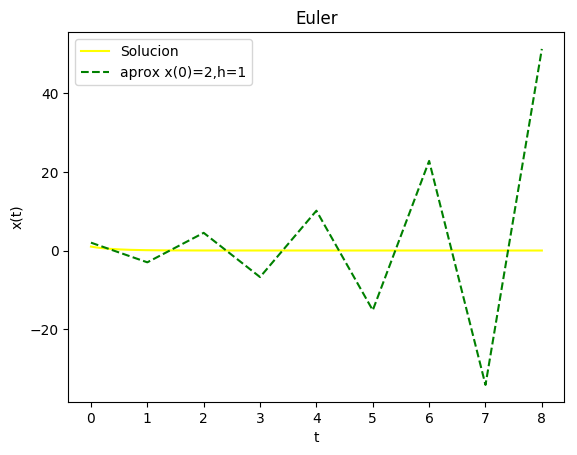

PyObject <matplotlib.legend.Legend object at 0x7f65fa0e0890>

In [10]:
using PyPlot
xlabel("t")
ylabel("x(t)")
title("Euler") 
t=linspace(0,8,1000)
plot(t,q(1,t),label= "Solucion", color= "yellow")
legend()
plot(list8[2],list8[1],label= "aprox x(0)=2,h=1","--",color="green")
legend()

### Desacoplamiento de ecuaciones diferenciales de orden 2.

__Ejercicio 2:__. ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?
* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.


_Sabemos que es la ecuación $\ddot{x}=-kx$ es la ley de Hoke, por lo tanto, la ecuación modela un resorte y la ecuación anterior se ve como:_
$$\ddot{x}+kx=0$$

$$
\Rightarrow\frac{d^2x}{dt^2}+kx=0
$$

$$
\Rightarrow \lambda^2+k=0\Rightarrow \lambda=\pm\sqrt{-k}
$$

$$
\Rightarrow \lambda_1=i\sqrt{k},\hspace{.5cm} \lambda_2=-i\sqrt{k}
$$

_y la solución queda como_ $x(t)= Ae^{\sqrt{k}it}+Be^{-\sqrt{k}it}$
$$\Rightarrow x(t)= Acos(\sqrt{k}t)+Bsin(\sqrt{k}t)$$

$$
\Rightarrow x(0)= Acos(0)+Bsin(0)=A \hspace{.5cm}
$$

$ x'(0)= -A\sqrt{k}sin(\sqrt{k}t)+B\sqrt{k}cos(\sqrt{k}t)=B\sqrt{k}$
$$\Rightarrow B=\frac{x'(0)}{\sqrt{k}}$$
_Sustituyendo A y B en la solución, obtenemos:_
$$
x(t)= x(0)cos(\sqrt{k}t)+\frac{x'(0)}{\sqrt{k}}sin(\sqrt{k}t)$$



__Ejercicio 3:__. Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?



_Tenemos que_$$\ddot{x}=-kx$$

_Con $u(t)=\dot{x}(t)$, $\hspace{.3cm}$ $\dot{u}(t)=\ddot{x}(t)=-kx(t)$,  que da un sistema de ecuaciones diferenciales de primer orden:_

$$
\left\{\begin{array}{ll}
\dot{x(t)}=u,\hspace{2cm}  x_{0}=x(0)\\
\dot{u(t)}=-kx(t),\hspace{2cm}  u_{0}=\dot{x}(0)
\end{array}\right.
$$

$\Rightarrow$ Sea $\mathbf{x}(t)=(x(t),u(t))$ y $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-kx(t))$, entonces:
$$\frac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t),$$
con la condición inicial $\mathbf{x}_{0}=\mathbf{x}(0)$.Si $\ddot{x}=f(x,\dot{x},t)$ con $x_{0}=x(t_{0})$ y $\dot{x}_{0}=\dot{x}(t_{0})$ también $u=\dot{x}$ y $\dot{u}=f(x,u,t)$, (ecuación diferencial vectorial), con el método de Euler, se tiene que:
$$\left\{\begin{array}{ll}
x_{k+1}=x_{k}+hu_{k}, \hspace{2cm} x_{0}=x(t_{0})\\
u_{k+1}=u_{k}+hf(x_{k},u_{k},t_{k}), \hspace{2cm} u_{0}=\dot{x}(t_{0})
\end{array}\right.$$

__Ejercicio 4:__. Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

* Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.

In [11]:
function euler2(f,x0,u0,listp)
    n = length(listp)   
    list_x = zeros(n)            
    list_u = zeros(n)             
    list_x[1] = x0                
    list_u[1] = u0                
    h = (listp[n]-listp[1])/n   
    for i in 1:n-1
        list_x[i+1] = list_x[i] + h*list_u[i]                       
        list_u[i+1] = list_u[i] + h*f(list_x[i],list_u[i],listp[i])  
    end
    return list_x
end;

In [12]:
listp_1=0:0.2:2pi;
listp_2=0:0.1:2pi;
listp_3=0:0.01:2pi;
E1=euler2((x,u,t)->-4x,3,5,listp_1);
E2=euler2((x,u,t)->-4x,3,5,listp_2);
E3=euler2((x,u,t)->-4x,3,5,listp_3);

In [15]:
R(t)=3*cos(2t)+(5/2)*sin(2t);


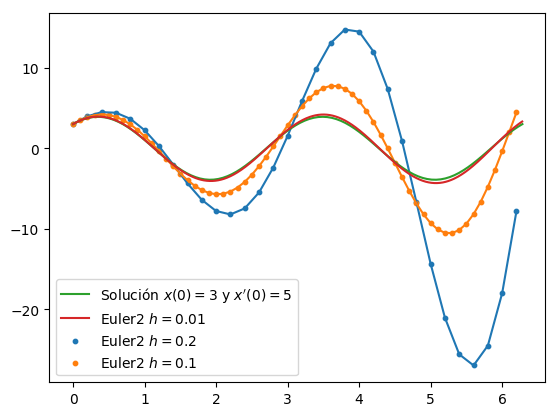

In [18]:
scatter(listp_1,E1,label=L"Euler2 $h=0.2$",s=10)
plot(listp_1,E1)
scatter(listp_2,E2,label=L"Euler2 $h=0.1$",s=10)
plot(listp_2,E2)
t = linspace(0,2pi,100)
plot(t,R.(t),label=L"Solución $x(0)=3$ y $x'(0)=5$")
plot(listp_3,E3,label=L"Euler2 $h=0.01$")
legend()
show();

__Ejercicio 5:__ Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

In [22]:
function euler3(f,x0,listr)
    n = length(listr)            
    list_x = zeros(n)             
    list_x[1] = x0               
    h = (listr[n]-listr[1])/n    
    for i in 1:n-1
        list_x[i+1] = list_x[i] + h*f(list_x[i],listr[i])   # FormulA Método de Euler.
    end
    return list_x                  
end;

In [34]:
listr_1=0:0.2:3;
listr_2=0:0.1:3;
listr_3=0:0.01:3;
P1=euler3((x,t)->(2x-18t)/(1+t),4,listr_1)
P2=euler3((x,t)->(2x-18t)/(1+t),4,listr_2)
P3=euler3((x,t)->(2x-18t)/(1+t),4,listr_3)

301-element Array{Float64,1}:
   4.0    
   4.07973
   4.15848
   4.23623
   4.31298
   4.38875
   4.46353
   4.53731
   4.6101 
   4.6819 
   4.75271
   4.82252
   4.89135
   ⋮      
 -14.0766 
 -14.282  
 -14.4884 
 -14.6958 
 -14.9042 
 -15.1135 
 -15.3238 
 -15.5352 
 -15.7475 
 -15.9607 
 -16.175  
 -16.3902 

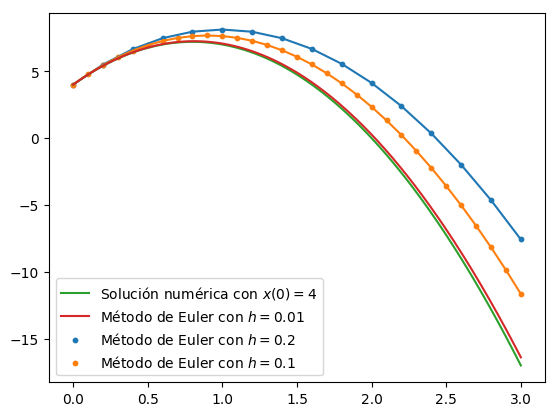

In [35]:
scatter(listr_1,P1,label=L"Método de Euler con $h=0.2$",s=10)
plot(listr_1,P1)
scatter(listr_2,P2,label=L"Método de Euler con $h=0.1$",s=10)
plot(listr_2,P2)
t = linspace(0,3,100)
plot(t,-5t.^2+8t+4,label=L"Solución numérica con $x(0)=4$")
plot(listr_3,P3,label=L"Método de Euler con $h=0.01$")
legend()
show();